In [3]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from tqdm import tqdm
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from sklearn.linear_model import SGDClassifier
import pickle

/Users/wolfiemina/anaconda3/lib/python3.11/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:
pd.set_option('display.width', 500)

data_2 = pd.read_csv('mbti_1_balanced.csv')

count = 542

infj = data_2[data_2['type'] == 'INFJ']
infp = data_2[data_2['type'] == 'INFP']
intp = data_2[data_2['type'] == 'INTP']
intj = data_2[data_2['type'] == 'INTJ']
entp = data_2[data_2['type'] == 'ENTP']
enfp = data_2[data_2['type'] == 'ENFP']
istp = data_2[data_2['type'] == 'ISTP']
isfp = data_2[data_2['type'] == 'ISFP']
entj = data_2[data_2['type'] == 'ENTJ']
istj = data_2[data_2['type'] == 'ISTJ']
enfj = data_2[data_2['type'] == 'ENFJ']
isfj = data_2[data_2['type'] == 'ISFJ']
estp = data_2[data_2['type'] == 'ESTP']
esfp = data_2[data_2['type'] == 'ESFP']
esfj = data_2[data_2['type'] == 'ESFJ']
estj = data_2[data_2['type'] == 'ESTJ']

estj.sample(2) # this will choose 2 random users
# i want to sample 542 users, since that's the average throughout my data

infj = infj.sample(count)
infp = infp.sample(count)
intp = intp.sample(count)
intj = intj.sample(count)
entp = entp.sample(count)
enfp = enfp.sample(count)

# Part 2: Oversampling
estj = estj.sample(count, replace=True)
istp = istp.sample(count, replace=True)
istj = istj.sample(count, replace=True)
enfj = enfj.sample(count, replace=True)
entj = entj.sample(count, replace=True)
isfp = isfp.sample(count, replace=True)
estp = estp.sample(count, replace=True)
esfp = esfp.sample(count, replace=True)
esfj = esfj.sample(count, replace=True)
isfj = isfj.sample(count, replace=True)


dfs = [infj, infp, intp, intj, entp, enfp, istp, isfp, entj, istj, enfj, isfj, estp, esfp, esfj, estj]
data_2 = pd.concat(dfs, ignore_index=True)

data_2['type'].value_counts()

type
INFJ    542
INFP    542
INTP    542
INTJ    542
ENTP    542
ENFP    542
ISTP    542
ISFP    542
ENTJ    542
ISTJ    542
ENFJ    542
ISFJ    542
ESTP    542
ESFP    542
ESFJ    542
ESTJ    542
Name: count, dtype: int64

## Visualization

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||h...'No, I can't draw on my own nails (haha). Those...I'm not sure, that's a good question. The disti...'One time my parents were fighting over my dad'...'Joe santagato - ENTP|||ENFJ or  ENTP?   I'm no...'some of these both excite and calm me:  BUTTS ...'I fully believe in the power of being a protec...'It is very annoying to be misinterpreted. Espe...'I think that that can absolutely be true of in...it could be pyroluria.. you know.. it is an ong...'Sometimes I wonder that too.. the reason being...http://www.youtube.com/watch?v=ipUdoUcNmKI  htt...'Trying not to feel totally worthless...  Why d...'Me: INFJ Mom: ISTJ Dad: ENFJ Sister: ISTJ|||I ...'I would strongly recommend not taking shortcut...'than you may be an ambivert, somewhere in the ...'Yeah i'm an a-hole too depending on who you ar...'Thanks  JayDubs  Miss Bingley LittleDreamer  Y...I hate not being able to afford any real help o...'Amelie - though I'm sure someone has mentioned..

In [36]:
mapping = {
    'I': 'Introversion - İçedönüklük',
    'E': 'Extroversion - Dışadönüklük',
    'N': 'Intuition - Sezgisellik',
    'S': 'Sensing - Duyumsama (Sağduyu)',
    'T': 'Thinking - Düşünme',
    'F': 'Feeling - Hissetme',
    'J': 'Judging - Yargılama',
    'P': 'Perceiving - Algılama',
}

In [37]:
X = pd.DataFrame()
for c in 'INTJESFP':
    X[c] = data_1['type'].apply(lambda x: 1 if c in x else 0)

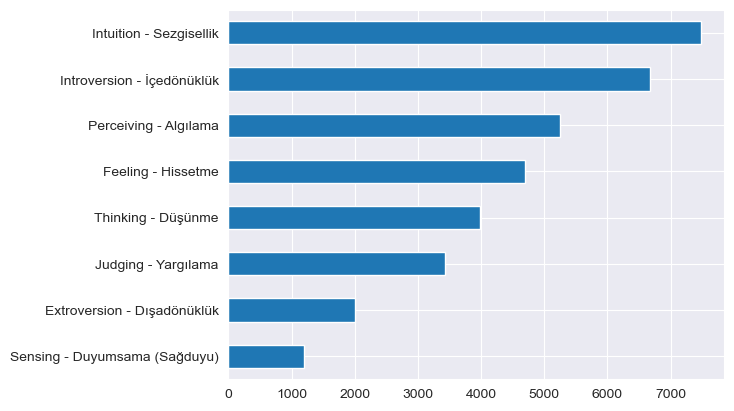

In [38]:
_ = X.sum().sort_values().rename(lambda x: mapping[x]).plot.barh()

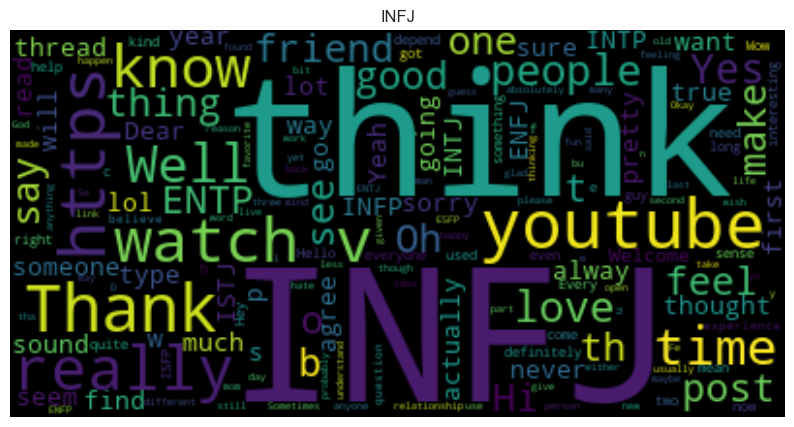

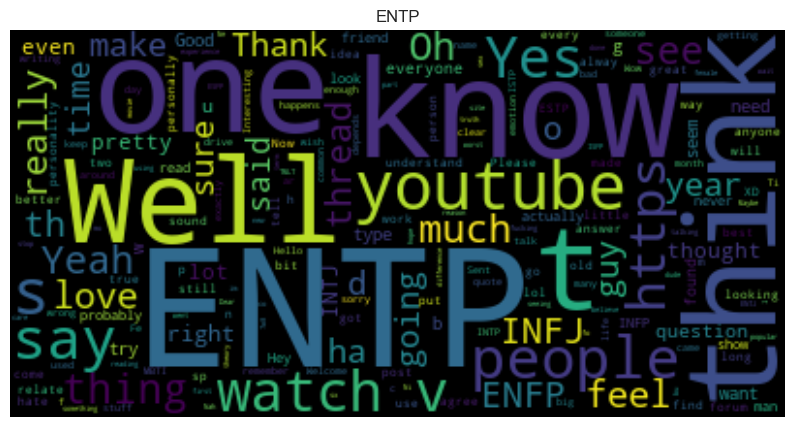

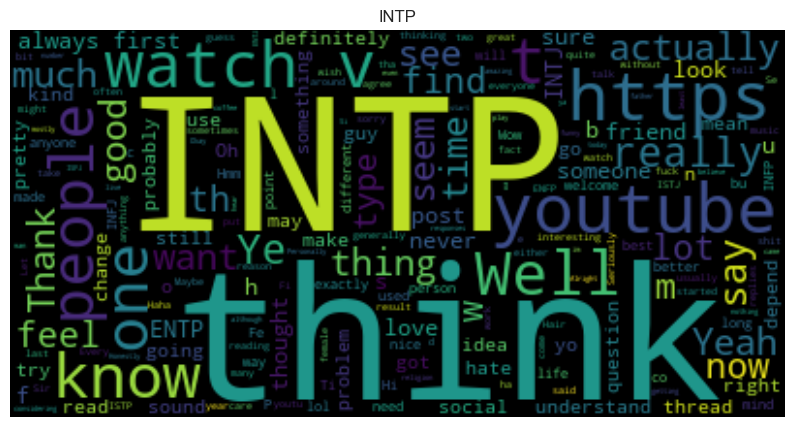

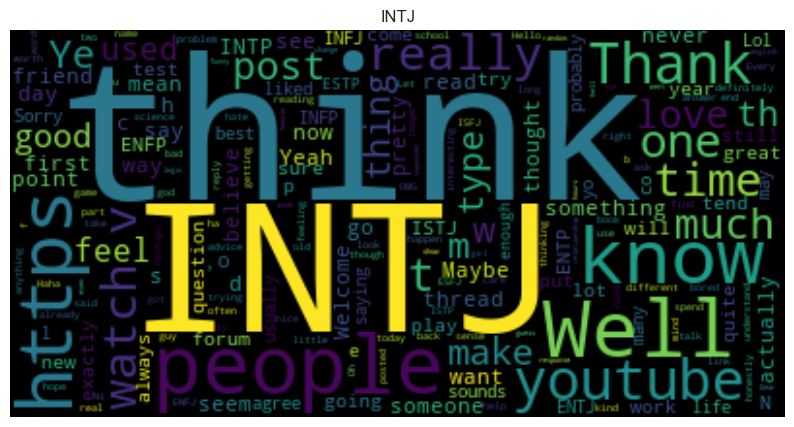

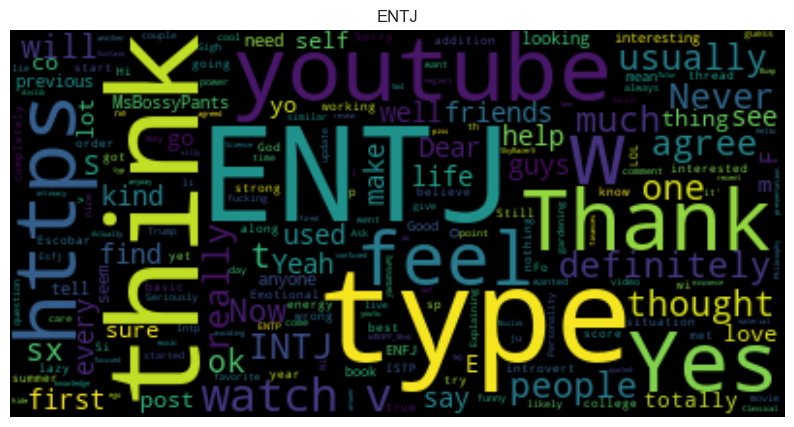

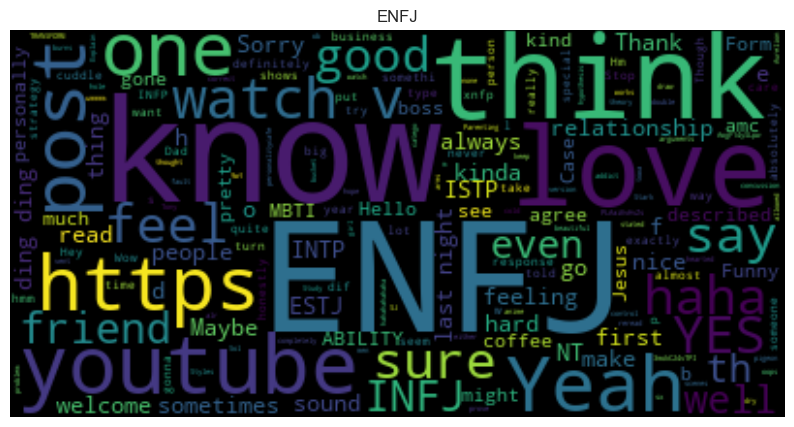

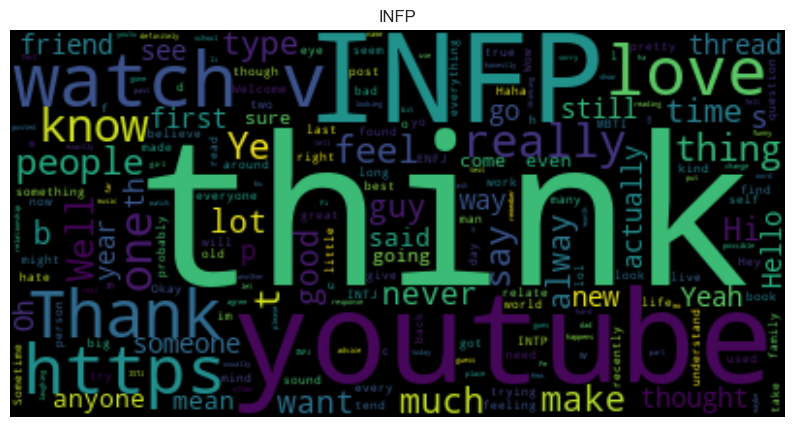

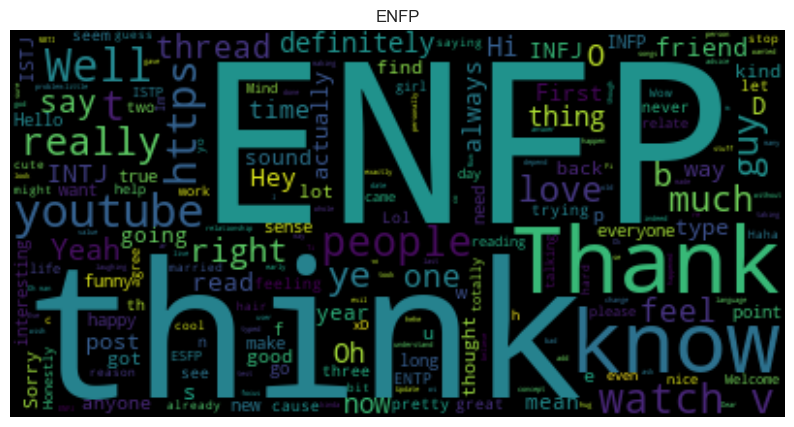

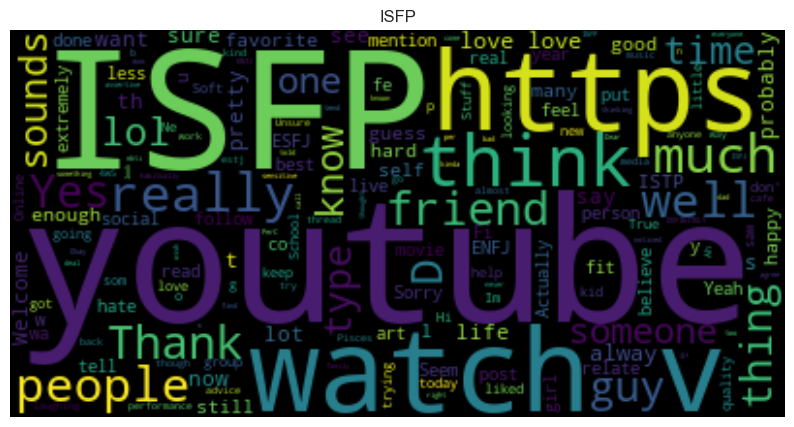

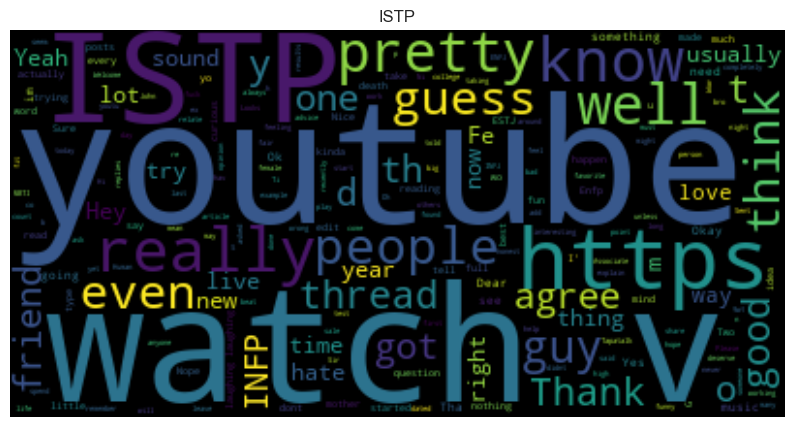

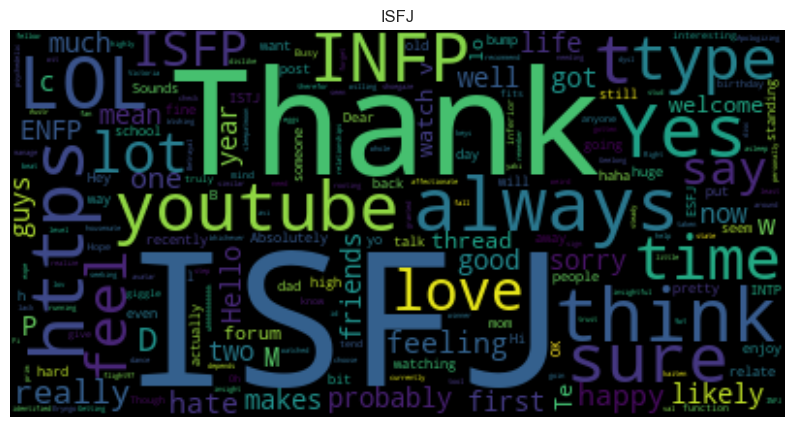

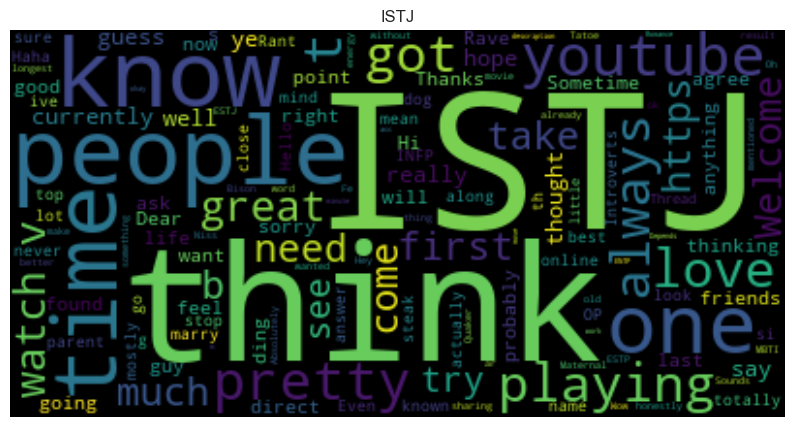

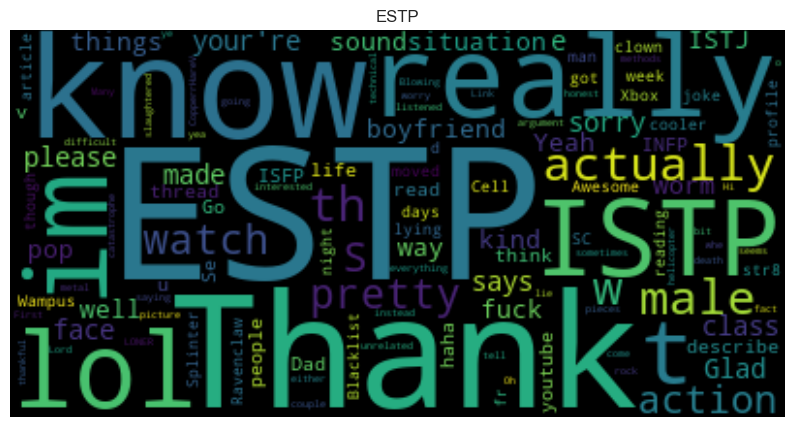

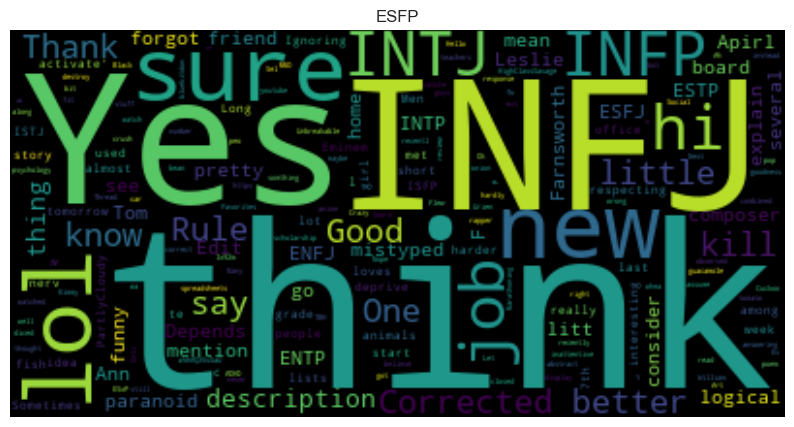

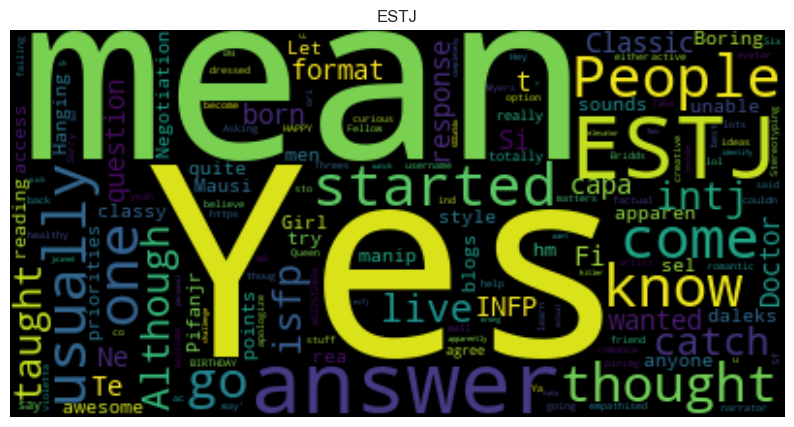

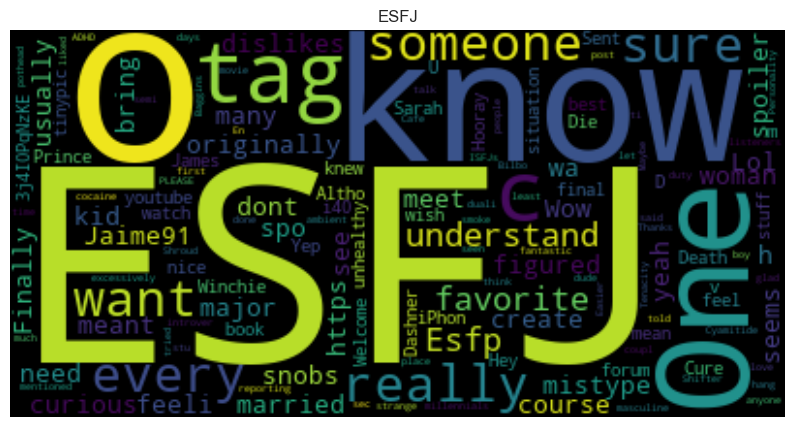

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming df_1 is your DataFrame
for i in data_1['type'].unique():
    df_4 = data_1[data_1['type'] == i]
    wordcloud = WordCloud().generate(df_4['posts'].to_string())

    # Create a new figure for each type
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    plt.axis("off")

plt.show()

In [30]:
data1 = pd.read_csv("mbti_1_balanced.csv")

In [39]:
cv = CountVectorizer(max_features=2000, strip_accents='ascii')
result = cv.fit_transform(data_1['posts'])

In [40]:
X = pd.concat([X, pd.DataFrame(result.toarray(), columns=['w_' + k for k in cv.vocabulary_.keys()])], axis=1)

In [41]:
wcols = [col for col in X.columns if col.startswith('w_') and len(col) > 5]
XX = X[wcols].T[X[wcols].mean() >= 0.5].T
def unique_words(a, b):
    (XX[X[a] == 1].mean() / XX[X[b] == 1].mean()).sort_values().rename(lambda x: x[2:]).tail(10).plot.barh()
    plt.title(mapping[a] + ' vs ' + mapping[b])

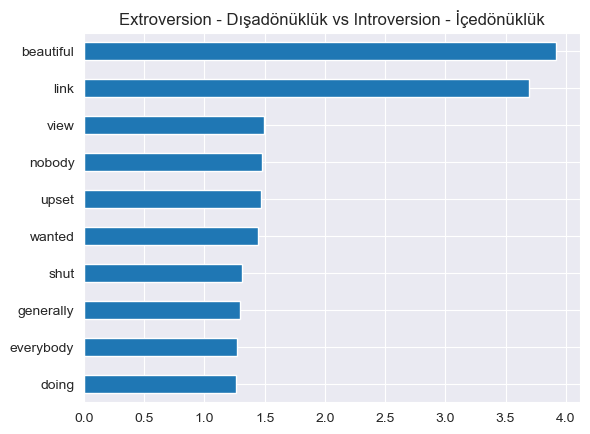

In [42]:
unique_words('E', 'I')

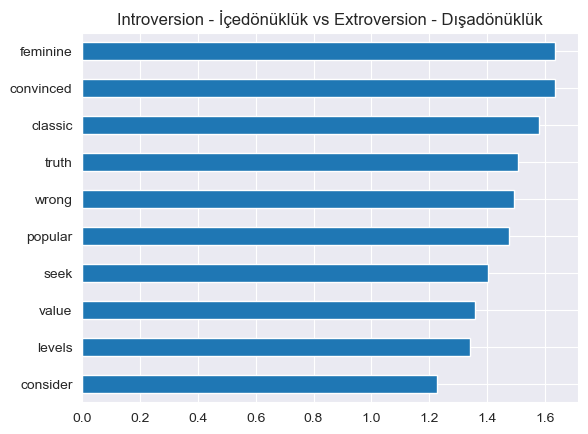

In [43]:
unique_words('I', 'E')

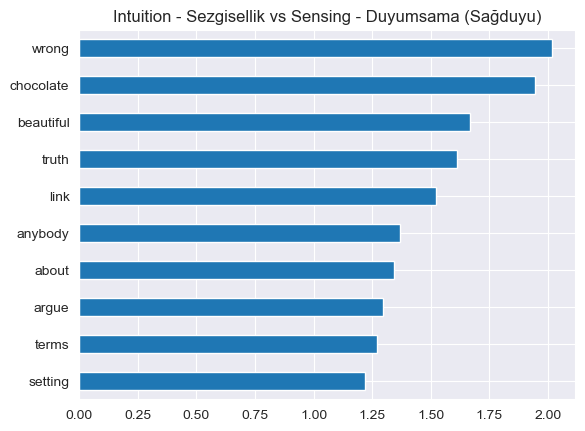

In [44]:
unique_words('N', 'S')

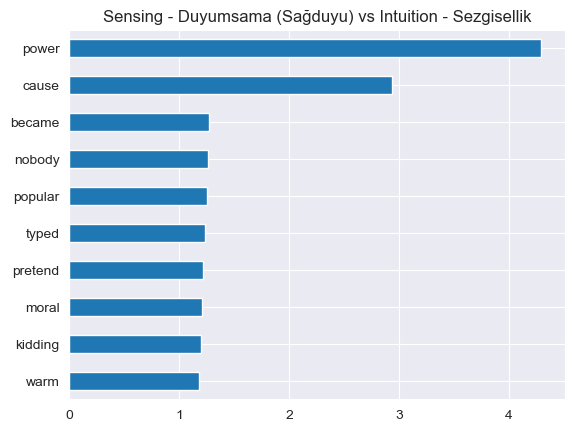

In [45]:
unique_words('S', 'N')

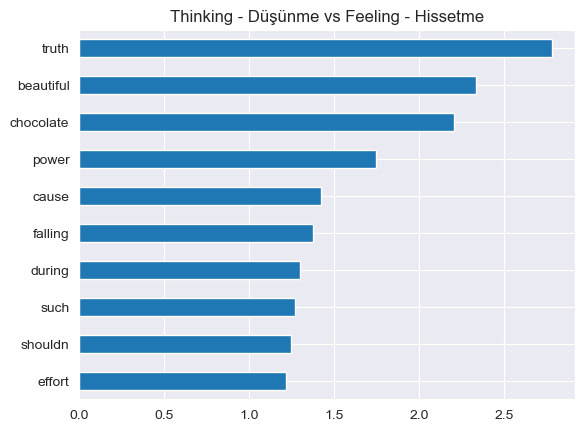

In [46]:
unique_words('T', 'F')

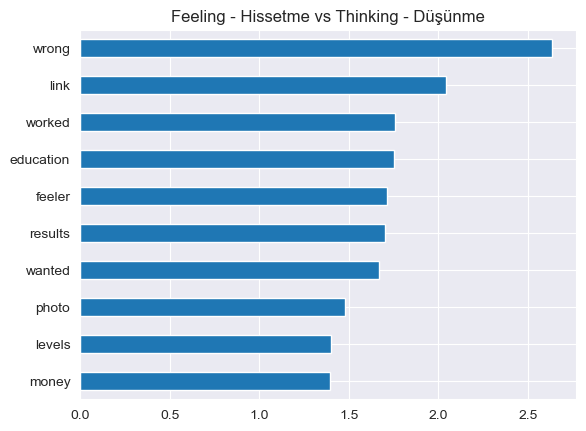

In [47]:
unique_words('F', 'T')

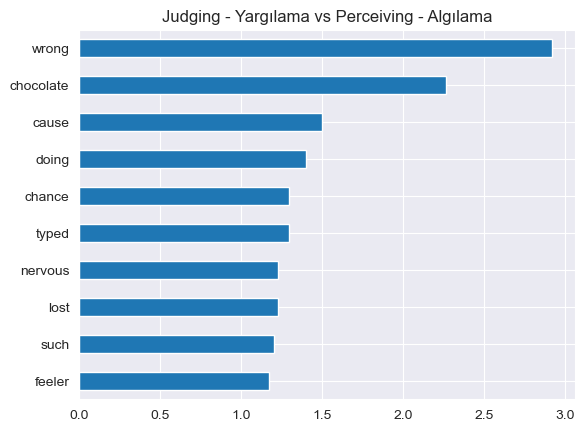

In [48]:
unique_words('J', 'P')

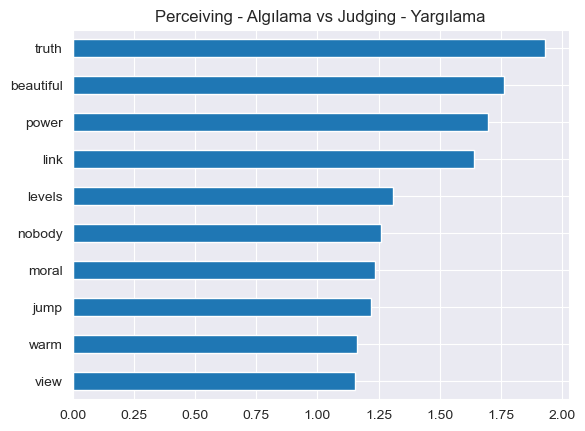

In [49]:
unique_words('P', 'J')

## PREPROCESSING

In [3]:
""" PRE PROCESSING """
lemmatiser = WordNetLemmatizer() # links words with similar meaning to one word.

# Remove the stop words for speed
useless_words = stopwords.words("english")

# Remove these from the posts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
unique_type_list = [x.lower() for x in unique_type_list]

# Splitting the MBTI personality into 4 letters and binarizing it

b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector
    return [b_Pers[l] for l in personality]

#To show result output for personality prediction
def translate_back(personality):
    # transform binary vector to mbti personality
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in data_2.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

# This is an important part. We remove unnecessary words, elements, breaks, letters etc.
# and use above functions to convert mbti to labeled format
import nltk
# nltk.download('wordnet')
def pre_process_text(data_2, remove_stop_words=True, remove_mbti_profiles=True):
    list_personality = []
    list_posts = []
    len_data = len(data_2)
    i = 0

    for row in data_2.iterrows():
        # check code working
        # i+=1
        # if (i % 500 == 0 or i == 1 or i == len_data):
        #     print("%s of %s rows" % (i, len_data))

        # Remove and clean comments
        posts = row[1].posts

        # Remove url links
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)

        # Remove Non-words - keep only words
        temp = re.sub("[^a-zA-Z]", " ", temp)

        # Remove spaces > 1
        temp = re.sub(' +', ' ', temp).lower()

        # Remove multiple letter repeating words
        temp = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', temp)

        # Remove stop words
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in useless_words])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])

        # Remove MBTI personality words from posts
        if remove_mbti_profiles:
            for t in unique_type_list:
                temp = temp.replace(t, "")

        # transform mbti to binary vector
        type_labelized = translate_personality(row[1].type)  # or use lab_encoder.transform([row[1].type])[0]
        list_personality.append(type_labelized)
        # the cleaned data temp is passed here
        list_posts.append(temp)

    # returns the result
    list_posts = np.array(list_posts)
    list_personality = np.array(list_personality)
    return list_posts, list_personality


list_posts, list_personality = pre_process_text(data_2, remove_stop_words=True, remove_mbti_profiles=True)

print("Example :")
print("\nPost before preprocessing:\n\n", data_2.posts[0])
print("\nPost after preprocessing:\n\n", list_posts[0])
print("\nMBTI before preprocessing:\n\n", data_2.type[0])
print("\nMBTI after preprocessing:\n\n", list_personality[0])

Binarize MBTI list: 
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 ...
 [1 1 1 0]
 [1 1 1 0]
 [1 1 1 0]]


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mohammedbashir/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Example :

Post before preprocessing:

 'Thanks. It's all mixed together -- grief, envy, regrets and anger.|||Thanks. I am frustrated, for different reasons. 1) She achieved the success I never did. 2) Parts of my family's problems appeared in her work, without our knowledge or consent 3) She was a bitch to...|||Thanks. Maybe I am overthinking it.|||I've been wrestling with this one. Haven't come to a satisfying answer so I wanted to try it out on the forum, see what wisdom I get.  I have a cousin who is very creative. Her writing has won...|||I'm reading The Most Important Person in the Room, doing the exercises diligently each day. It's really helping. I find I'm less tired than before. I used to be exhausted dealing with people. The...|||Thanks I appreciate the offer. I have, however, seen therapists up the ying yang and read lots and analyzed lots. I get the feeling what I need to heal is not words but action. Maybe a pet. Or daily...|||Meditation is excellent. You could also try C

## FEATURE ENGINEERING

### Count Vectorizer

In [4]:
#################
""" FEATURE ENGINEERING """
################
# Vectorizing the database posts to a matrix of token counts for the model
cntizer = CountVectorizer(analyzer="word",
                             max_features=1000,
                             max_df=0.7,
                             min_df=0.1)
# the feature should be made of word n-gram
# Learn the vocabulary dictionary and return term-document matrix
print("Using CountVectorizer :")
X_cnt = cntizer.fit_transform(list_posts)

#The enumerate object yields pairs containing a count and a value (useful for obtaining an indexed list)
feature_names = list(enumerate(cntizer.get_feature_names_out()))
print("10 feature names can be seen below")
print(feature_names[0:10])
# [(0, 'ability'), (1, 'able'), (2, 'absolutely'), (3, 'across'), (4, 'act'), (5, 'action'), (6, 'actually'), (7, 'add'), (8, 'advice'), (9, 'afraid')]

Using CountVectorizer :
10 feature names can be seen below
[(0, 'ability'), (1, 'able'), (2, 'absolutely'), (3, 'accurate'), (4, 'across'), (5, 'act'), (6, 'action'), (7, 'actually'), (8, 'add'), (9, 'advice')]


## Tfizer

In [8]:
# For the Standardization or Feature Scaling Stage :-
# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
print("\nUsing Tf-idf :")
print("Now the dataset size is as below")
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
print(X_tfidf.shape)
# Using Tf-idf :
# Now the dataset size is as below
# (8672, 562)
# (8672, 568)
# Therefore we now have 568 features for each user post.


Using Tf-idf :
Now the dataset size is as below
(8672, 571)


In [10]:
# TOP 10 WORDS
reverse_dic = {}
for key in cntizer.vocabulary_:
    reverse_dic[cntizer.vocabulary_[key]] = key
top_10 = np.asarray(np.argsort(np.sum(X_cnt, axis=0))[0,-10:][0, ::-1]).flatten()
[reverse_dic[v] for v in top_10]
# ['feel', 'type', 'well', 'say', 'way', 'friend', 'want', 'love','good', 'something']
# new: 
# ['type',
#  'feel',
#  'well',
#  'friend',
#  'much',
#  'way',
#  'want',
#  'good',
#  'love',
#  'see']
##################################
# Splitting into X and Y
# X: User Posts in TF-IDF representation
# Y: Personality type in Binarized MBTI form

# 1. Split IE - I / E, NS - N/S ... etc
# We will use IE, NS, FT, JP in our evaluations.
personality_type = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) / Sensing (S)",
                   "FT: Feeling (F) / Thinking (T)", "JP: Judging (J) / Perceiving (P)"  ]

for l in range(len(personality_type)):
    print(personality_type[l])

# IE: Introversion (I) / Extroversion (E)
# NS: Intuition (N) / Sensing (S)
# FT: Feeling (F) / Thinking (T)
# JP: Judging (J) / Perceiving (P)

# X_tfidf (tf-idf representation of words)
print("X: 1st posts in tf-idf representation\n%s" % X_tfidf[0])

# X_tfidf and Y (list_personality -- binarized)
print("For MBTI personality type : %s" % translate_back(list_personality[0,:]))
print("Y : Binarized MBTI 1st row: %s" % list_personality[0,:])


# First user
list_personality[0,:]  # Y
X_tfidf[0] # X in tf-idf format

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) / Sensing (S)
FT: Feeling (F) / Thinking (T)
JP: Judging (J) / Perceiving (P)
X: 1st posts in tf-idf representation
[0.         0.04052035 0.04670139 0.         0.         0.
 0.04869505 0.02769707 0.         0.         0.0467848  0.0389329
 0.         0.         0.         0.         0.         0.0732986
 0.         0.10084522 0.         0.         0.         0.
 0.03394031 0.03678001 0.         0.         0.         0.
 0.04819308 0.         0.02977382 0.         0.03702267 0.04912995
 0.09486074 0.         0.05350451 0.         0.         0.
 0.05806622 0.06799041 0.         0.         0.         0.
 0.06829977 0.02925845 0.         0.         0.03442976 0.05242717
 0.         0.         0.05397813 0.         0.         0.
 0.04944977 0.         0.         0.04483791 0.         0.03522783
 0.         0.         0.         0.         0.         0.
 0.         0.         0.04398972 0.         0.         0.
 0.03870451 0.       

array([0.        , 0.04052035, 0.04670139, 0.        , 0.        ,
       0.        , 0.04869505, 0.02769707, 0.        , 0.        ,
       0.0467848 , 0.0389329 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0732986 , 0.        , 0.10084522,
       0.        , 0.        , 0.        , 0.        , 0.03394031,
       0.03678001, 0.        , 0.        , 0.        , 0.        ,
       0.04819308, 0.        , 0.02977382, 0.        , 0.03702267,
       0.04912995, 0.09486074, 0.        , 0.05350451, 0.        ,
       0.        , 0.        , 0.05806622, 0.06799041, 0.        ,
       0.        , 0.        , 0.        , 0.06829977, 0.02925845,
       0.        , 0.        , 0.03442976, 0.05242717, 0.        ,
       0.        , 0.05397813, 0.        , 0.        , 0.        ,
       0.04944977, 0.        , 0.        , 0.04483791, 0.        ,
       0.03522783, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04398

# Modeling

In [26]:
""" Modeling """
my_posts  = "a walking brainstorm with a dash of unpredictability. Picture this: a perpetual idea generator, fueled by caffeine and curiosity. I thrive on the thrill of mental acrobatics, effortlessly leaping from one concept to another. Routine? Not my jam. I dance on the edge of chaos, where possibilities bloom like wildflowers. Debate is my playground, and I revel in dismantling arguments with a mischievous grin. Structure might cramp my style, but innovation is my middle name. Life's a grand experiment, and I'm the mad scientist juggling possibilities with a sprinkle of charm. Cheers to the wild ride of ideas!"

# The type is just a dummy so that the data prep function can be reused
mydata = pd.DataFrame(data={'type': ['ENTJ'], 'posts': [my_posts]})

my_posts, dummy  = pre_process_text(mydata, remove_stop_words=True, remove_mbti_profiles=True)

my_X_cnt = cntizer.transform(my_posts)
my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()


# XGBoost model for MBTI dataset
models = {}
result = []

# Individually training each mbti personlity type
for l in range(len(personality_type)):
    print("%s classifier trained" % (personality_type[l]))

    Y = list_personality[:, l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = XGBClassifier()
    model.fit(X_train, y_train)

    model_name = f'model_{l + 1}'
    models[model_name] = model

    # make predictions for my data
    y_pred = models[model_name].predict(my_X_tfidf)
    result.append(y_pred[0])
    
print('####################')
print(result)
print("The translated result is: ", translate_back(result))
# The result is:  INFJ

IE: Introversion (I) / Extroversion (E) classifier trained
NS: Intuition (N) / Sensing (S) classifier trained
FT: Feeling (F) / Thinking (T) classifier trained
JP: Judging (J) / Perceiving (P) classifier trained
####################
[0, 0, 1, 1]
The translated result is:  INTP


In [28]:
# result_2 = []
for index, (key, model) in enumerate(models.items()):
    # make predictions for my data
    y_pred = model.predict(my_X_tfidf)
    result_2.append(y_pred[0])
    
print("The result is: ", translate_back(result_2))

The result is:  INTP


## Save

In [29]:
# Save the CountVectorizer
with open('CountVector_1.pkl', 'wb') as f:
    pickle.dump(cntizer, f)
    

# Save the TfidfTransformer or TfidfVectorizer
with open('TFizer_1.pkl', 'wb') as f:
    pickle.dump(tfizer, f)
    

# Save each model by their key name
for model_name, model in models.items():
    filename = f"{model_name}.pkl"
    pickle.dump(model, open(filename, 'wb'))

    
# # Load the model
# with open('model.pkl', 'rb') as f:
#     model = pickle.load(f)